In [1]:
%matplotlib inline

import neurolab as nl
import numpy as np
import matplotlib.pylab as pl

pl.style.use('ggplot')
pl.rcParams["figure.figsize"] = [12, 9]

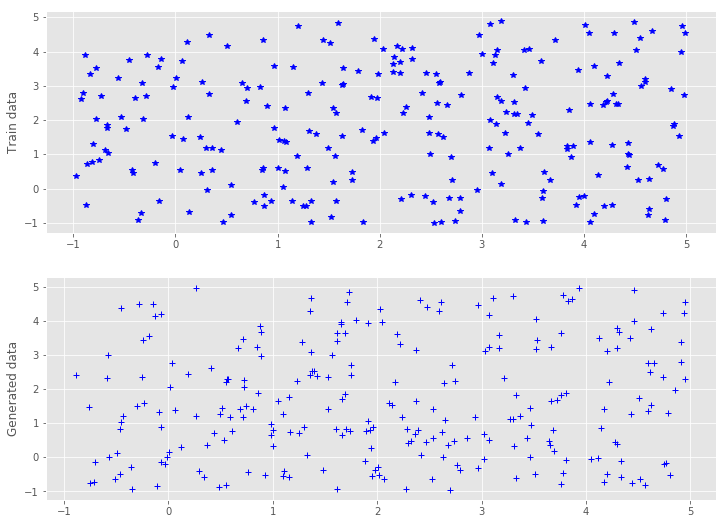

In [2]:
n = 250

x = np.random.uniform(-1, 5, (n, 2)).round(2)
xtrain = np.random.uniform(-1, 5, (n, 2)).round(2)

        
pl.subplot(211)
pl.ylabel("Train data")
pl.plot(xtrain[:,0], xtrain[:,1], 'b*')
pl.subplot(212)
pl.ylabel("Generated data")
pl.plot(x[:,0], x[:,1], 'b+')
pl.show()

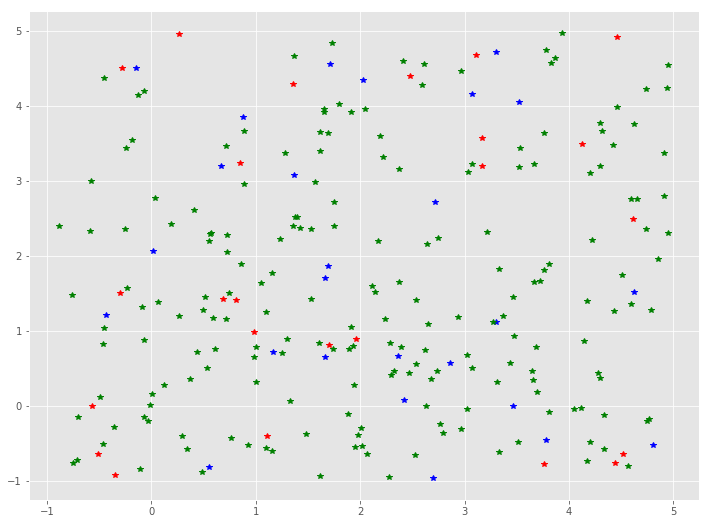

In [4]:
d = []

for i in range(250):
    if (xtrain[i,0]-1)**2+(xtrain[i,1]-1)**2 < 1:
        d.append([1, 0, 0])
    elif (xtrain[i,0]-3)**2+(xtrain[i,1]-3)**2 < 1:
        d.append([0, 1, 0])
    elif (xtrain[i,0]-3)**2+(xtrain[i,1]-3)**2 > 1 and (xtrain[i,0]-1)**2+(xtrain[i,1]-1)**2 > 1:
        d.append([0, 0, 1])

d = np.array(d)

for i in range(250):
    colour = 'r*' if d[i][0] == True else 'b*' if d[i][1] == True else 'g*'
    pl.plot(x[i, 0], x[i, 1], colour)

pl.show()

In [5]:
net = nl.net.newlvq(nl.tool.minmax(xtrain), n, [.3, .3, .4])

error = net.train(xtrain, d, epochs=1000, show=100, goal=0.02)

out = net.sim(x)

/home/anton/v_envs/test_env/lib/python3.6/site-packages/neurolab/net.py:179: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  layer_out.np['w'][n][st:i].fill(1.0)


Epoch: 100; Error: 0.042666666666666665;


Epoch: 200; Error: 0.037333333333333336;


Epoch: 300; Error: 0.029333333333333333;


Epoch: 400; Error: 0.02666666666666667;


The goal of learning is reached


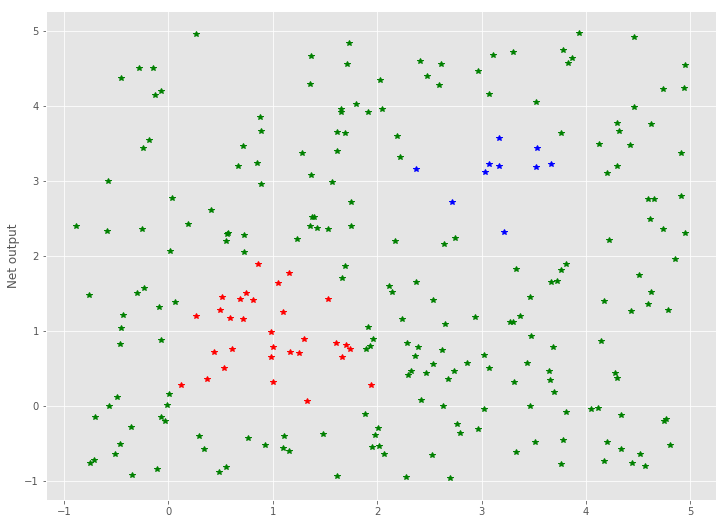

In [6]:
for i in range(250):
    colour = 'r*' if out[i][0] == True else 'b*' if out[i][1] == True else 'g*'
    # if (bool(out[i][0]) ^ bool(d[i][0])) or (bool(out[i][0]) ^ bool(d[i][0])):
    #     colour = 'ro'
    # elif (bool(out[i][1]) ^ bool(d[i][1])) or (bool(out[i][1]) ^ bool(d[i][1])):
    #     colour = 'bo'
    # elif (bool(out[i][2]) ^ bool(d[i][2])) or (bool(out[i][2]) ^ bool(d[i][2])):
    #     colour = 'go'
        
    pl.plot(x[i, 0], x[i, 1], colour)

pl.ylabel('Net output')
pl.show()